In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Fertilizer Prediction.csv')

In [3]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
Temparature        99 non-null int64
Humidity           99 non-null int64
Moisture           99 non-null int64
Soil Type          99 non-null object
Crop Type          99 non-null object
Nitrogen           99 non-null int64
Potassium          99 non-null int64
Phosphorous        99 non-null int64
Fertilizer Name    99 non-null object
dtypes: int64(6), object(3)
memory usage: 7.0+ KB


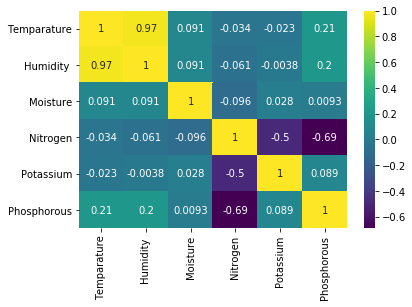

In [5]:
sns.heatmap(data.corr(),cmap = 'viridis',annot = True)

In [6]:
data['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [7]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
dummies = pd.get_dummies(data[['Soil Type','Crop Type']],drop_first = True)

In [9]:
data = pd.concat([data,dummies],axis = 1)

In [10]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Clayey,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,Sandy,Maize,37,0,0,Urea,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,Black,Cotton,7,9,30,14-35-14,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,Red,Tobacco,22,0,20,28-28,0,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,Clayey,Paddy,35,0,0,Urea,1,...,0,0,0,0,0,1,0,0,0,0


In [11]:
data = data.drop(['Soil Type', 'Crop Type'], axis = 1)

In [12]:
data.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
data["Fertilizer Name"] = data["Fertilizer Name"].astype('category')
data["Fertilizer Name"] = data["Fertilizer Name"].cat.codes

In [14]:
X = data.drop(['Fertilizer Name'], axis = 1)
y = data['Fertilizer Name']

In [15]:
X.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
y.head()

0    6
1    5
2    1
3    4
4    6
Name: Fertilizer Name, dtype: int8

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
train_predict = logmodel.predict(X_test)

In [49]:
train_predict

array([1, 0, 1, 3, 0, 6, 6, 6, 0, 4, 5, 0, 0, 4, 6, 5, 4, 3, 1, 3, 6, 6,
       4, 4, 5, 6, 3, 3, 5, 4, 6, 4, 5], dtype=int8)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,train_predict))

[[3 0 0 0 0 0 0]
 [1 3 0 0 1 1 0]
 [1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 2 4 1 1]
 [0 0 0 0 1 3 0]
 [0 0 0 0 1 0 7]]


In [52]:
print(classification_report(y_test,train_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       0.57      0.50      0.53         8
           5       0.60      0.75      0.67         4
           6       0.88      0.88      0.88         8

    accuracy                           0.70        33
   macro avg       0.61      0.66      0.61        33
weighted avg       0.71      0.70      0.68        33



C:\Users\ELCOT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': train_predict})
df

,Actual,Predicted
26,1,1
86,0,0
2,1,1
55,4,3
75,1,0
92,6,6
16,6,6
73,6,6
54,2,0
94,4,4
